<a href="https://colab.research.google.com/github/KavinduKariyawasam/Image_Processing/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mounting the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Intensity transformation.

Text(0.5, 1.0, 'Transformed Image')

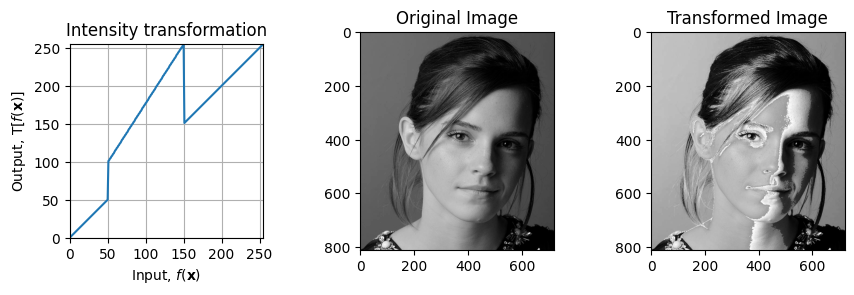

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype('uint8')

img = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/emma.jpg', cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img, transform)

f, ax = plt.subplots(1,3, figsize = (10,6))

plt.subplots_adjust(wspace=0.5)

ax[0].plot(transform)
ax[0].set_title("Intensity transformation")
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[0].grid(True)
ax[0].set_xticks(range(0,256,50))
ax[0].set_yticks(range(0,256,50))

ax[1].imshow(img, cmap = 'gray')
ax[1].set_title('Original Image')

ax[2].imshow(img_transformed, cmap = 'gray')
ax[2].set_title('Transformed Image')

##2. Transformations to accentuate white matter and gray matter in the brain proton density image.

Text(0.5, 1.0, 'Accentuate white matter')

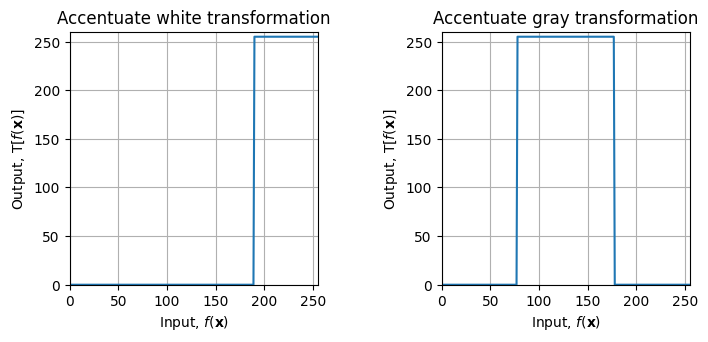

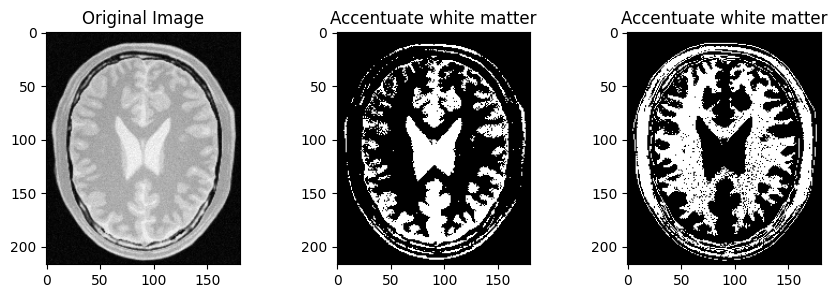

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Defining the transform to accentuate white matter
t1 = np.zeros(190)
t2 = 255*np.ones(66)
transform_white = np.concatenate((t1,t2), axis = 0).astype('uint8')

t3 = np.zeros(78)
t4 = 255*np.ones(100)
t5 = np.zeros(78)
transform_gray = np.concatenate((t3,t4,t5), axis = 0).astype('uint8')

# Load the image of the brain proton
img = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

img_tr_white = cv.LUT(img, transform_white)
img_tr_gray = cv.LUT(img, transform_gray)

f, ax = plt.subplots(1,2, figsize = (8,6))
plt.subplots_adjust(wspace=0.5)

ax[0].plot(transform_white)
ax[0].set_title("Accentuate white transformation")
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,260)
ax[0].set_aspect('equal')
ax[0].grid(True)
ax[0].set_xticks(range(0,256,50))
ax[0].set_yticks(range(0,256,50))

ax[1].plot(transform_gray)
ax[1].set_title("Accentuate gray transformation")
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,260)
ax[1].set_aspect('equal')
ax[1].grid(True)
ax[1].set_xticks(range(0,256,50))
ax[1].set_yticks(range(0,256,50))

f, ax = plt.subplots(1,3, figsize = (10,6))
plt.subplots_adjust(wspace=0.5)

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_tr_white, cmap = 'gray')
ax[1].set_title('Accentuate white matter')

ax[2].imshow(img_tr_gray, cmap = 'gray')
ax[2].set_title('Accentuate white matter')

##3. Gamma correction

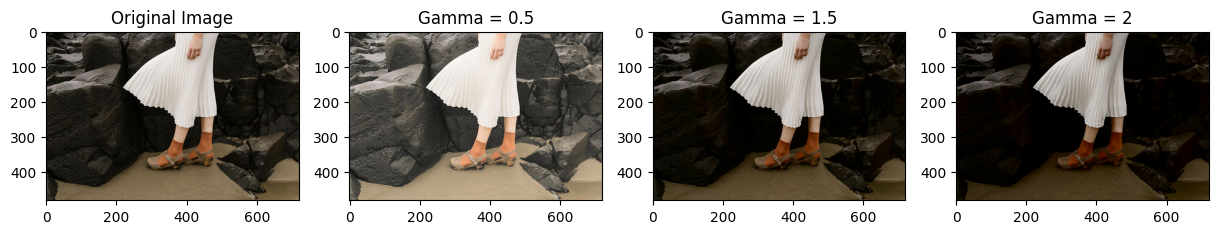

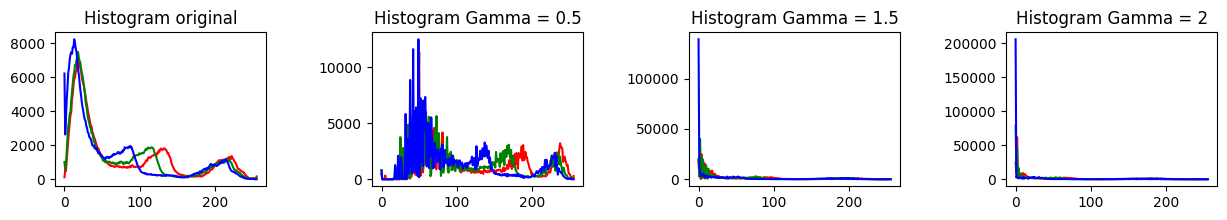

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_bgr = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/highlights_and_shadows.jpg')
img_ori = cv.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert the image to L*a*b* color space
img_lab = cv.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)

# Extract the L channel
L_channel = img_lab[:,:,0]

# Apply gamma correction to the L channel
gamma_values = [0.5,1.5, 2]
color = ('r', 'g', 'b')

f, ax = plt.subplots(1,4, figsize = (15,10))
f, hist_ax = plt.subplots(1,4, figsize = (15,2))

plt.subplots_adjust(wspace=0.5)

for i, c in enumerate(color):
  hist_ori = cv.calcHist([img_ori], [i], None, [256], [0, 256])
  hist_ax[0].plot(hist_ori, color = c)
  hist_ax[0].set_title('Histogram original')

ax[0].imshow(img_ori, cmap = 'gray')
ax[0].set_title('Original Image')



for gamma in range(len(gamma_values)):
  table = np.array([(i/255.0)**(gamma_values[gamma])*255.0 for i in np.arange(0, 256)]).astype('uint8')
  L_corrected = cv.LUT(L_channel, table)

# Replace the corrected L channel in the image
  img_lab_corrected = img_lab.copy()
  img_lab_corrected[:,:,0] = L_corrected

# Convert the corrected image back to BGR format
  img_corrected_bgr = cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2BGR)
  img_corrected_rgb = cv.cvtColor(img_corrected_bgr, cv.COLOR_BGR2RGB)

  for i, c in enumerate(color):
    hist_gamma = cv.calcHist([img_corrected_rgb], [i], None, [256], [0, 256])
    hist_ax[gamma+1].plot(hist_gamma, color = c)
    hist_ax[gamma+1].set_title('Histogram Gamma = ' + str(gamma_values[gamma]))

  ax[gamma+1].imshow(img_corrected_rgb, cmap = 'gray')
  ax[gamma+1].set_title('Gamma = ' + str(gamma_values[gamma]))

## Question 04

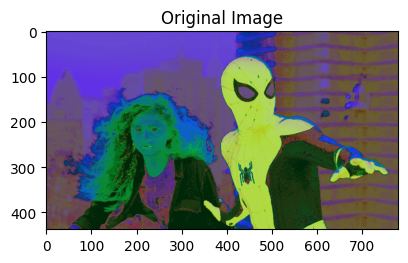

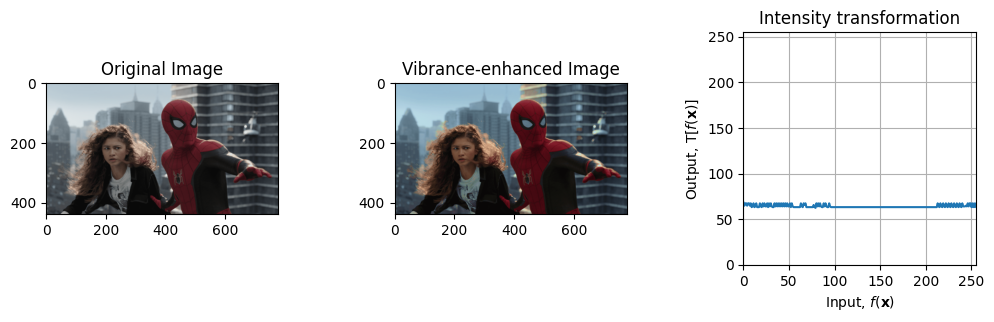

In [11]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_bgr = cv2.imread('/content/drive/MyDrive/Image processing/Assignment1/spider.png')

# Convert to HSV (Hue, Saturation and Value) color space
img_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Spliting the image into hue, saturation and value planes
H_channel = img_hsv[:,:,0]
S_channel = img_hsv[:,:,1]
V_channel = img_hsv[:,:,2]

# Applying the intensity transormation to the saturation plane
sigma = 70
x = S_channel
a = 0.3       # select a value between [0,1]

transform = np.minimum(x+ (a*128*np.exp((-(x-128)**2)/(2*(sigma**2)))), 255)

# Recombining the three planes
img_transformed = img_hsv.copy()
img_transformed[:,:,1] = transform

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_transformed)
plt.title('Original Image')

# Convert back to RGB color space
transformed_rgb_image = cv2.cvtColor(img_transformed, cv2.COLOR_HSV2RGB)

# Display original and vibrance-enhanced images
fig, ax = plt.subplots(1,3, figsize = (12,10))

plt.subplots_adjust(wspace = 0.5)

ax[0].imshow(img_original)
ax[0].set_title('Original Image')


ax[1].imshow(transformed_rgb_image)
ax[1].set_title('Vibrance-enhanced Image')

# Displaying the intensity transformation
ax[2].plot(transform.flatten())
ax[2].set_title("Intensity transformation")
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
ax[2].grid(True)
ax[2].set_xticks(range(0,256,50))
ax[2].set_yticks(range(0,256,50))

## Question 05

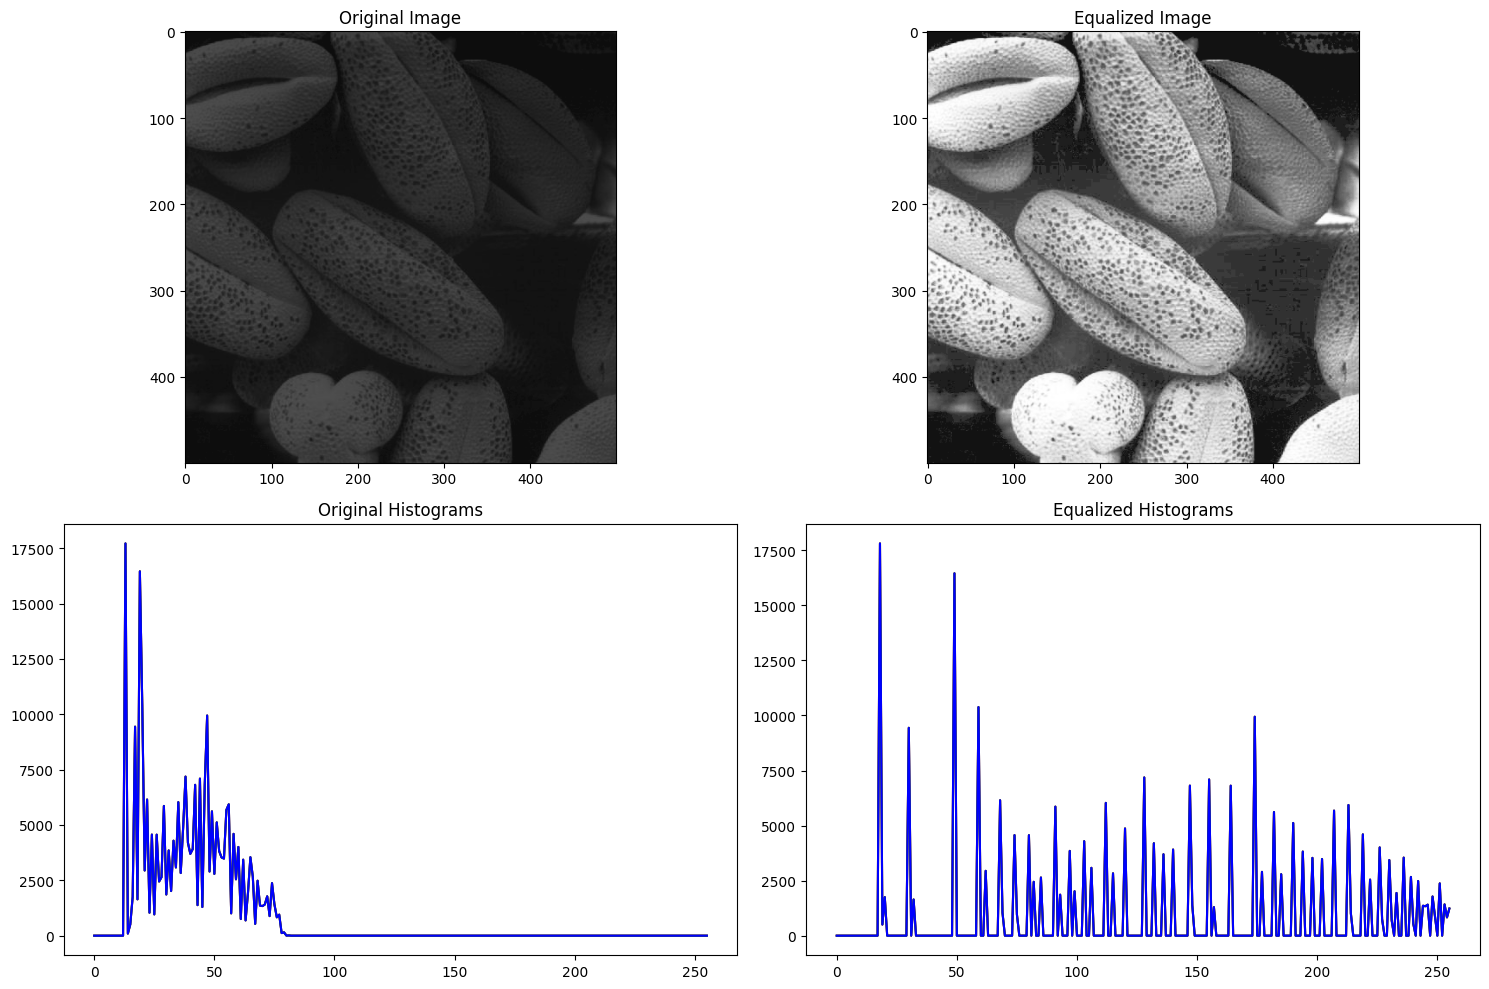

In [30]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/shells.tif', cv.IMREAD_COLOR)

# function definition
def histogram_equalization(img_orig):
    B, G, R = cv.split(img_orig)
    height, width = img_orig.shape[:2]
    MN = height * width
    L = 256
    color = ('b', 'g', 'r')
    color_palate = np.array([])

    for i, c in enumerate(color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
        np.set_printoptions(precision=8, suppress=True)
        hist_cumsum = np.cumsum(hist_orig)
        hist_cumsum = hist_cumsum * ((L-1) / MN)
        rounded_array = np.round(hist_cumsum).astype(int)
        color_palate = np.append(color_palate, rounded_array)
    equalize_B = cv.LUT(B, color_palate[0:256])
    equalize_G = cv.LUT(G, color_palate[256:512])
    equalize_R = cv.LUT(R, color_palate[512:768])

    img_equalize = cv.merge((equalize_B, equalize_G, equalize_R))
    img_equalize = img_equalize.astype(np.uint8)  # Convert to np.uint8
    img_equalize = cv.cvtColor(img_equalize, cv.COLOR_BGR2RGB)
    img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

    fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
    axarr[0, 0].imshow(img_orig)
    axarr[0, 0].set_title('Original Image')
    axarr[0, 1].imshow(img_equalize)
    axarr[0, 1].set_title('Equalized Image')
    color = ('r', 'g', 'b')

    for i, c in enumerate(color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
        axarr[1, 0].plot(hist_orig, color=c)
        axarr[1, 0].set_title('Original Histograms')
        hist_equalize = cv.calcHist([img_equalize], [i], None, [256], [0, 256])
        axarr[1, 1].plot(hist_equalize, color=c)
        axarr[1, 1].set_title('Equalized Histograms')
    plt.tight_layout()  # Adjusts spacing between subplots for better visibility
    plt.show()
    return

histogram_equalization(img_orig)

## Question 06

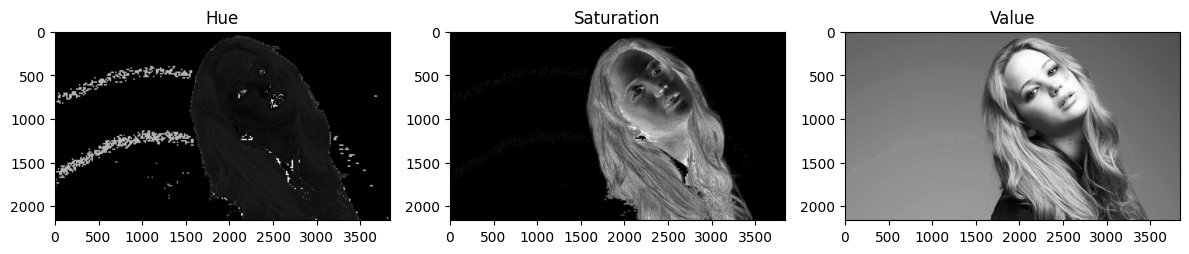

In [78]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/jeniffer.jpg')
img_hsv = cv2.cvtColor(img_orig, cv2.COLOR_BGR2HSV)

# Spliting the image into hue, saturation and value planes
hue, saturation, value = cv2.split(img_hsv)

# Display the channels
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.tight_layout()
plt.show()



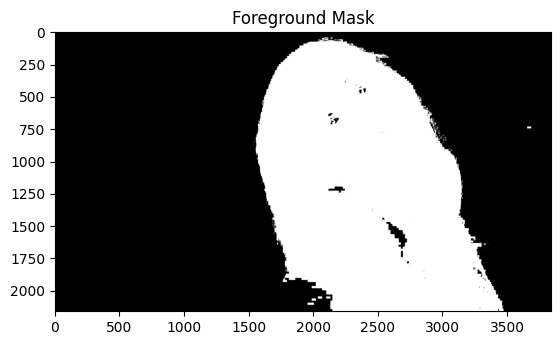

In [79]:
img, mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)
# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()

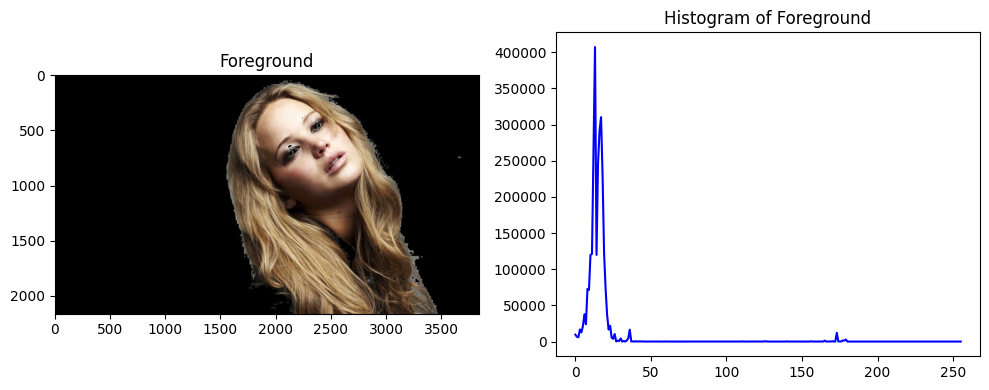

In [90]:
h_foreground = cv.bitwise_and(hue, hue, mask=mask)
s_foreground = cv.bitwise_and(saturation, saturation, mask=mask)
v_foreground = cv.bitwise_and(value, value, mask=mask)
foreground = cv.merge((h_foreground, s_foreground, v_foreground))
img_foreground = cv.cvtColor(foreground, cv.COLOR_HSV2RGB)

hist_foreground = cv2.calcHist([foreground], [0], mask, [256], [0, 256])

f, ax = plt.subplots(1,2 , figsize = (10,4))
# Display the histogram
ax[0].imshow(img_foreground)
ax[0].set_title('Foreground')

ax[1].plot(hist_foreground, color='blue')
ax[1].set_title('Histogram of Foreground')

plt.tight_layout()
plt.show()